A notebook for making a 100-frame movie from 3D dust for Linnea as a test

Two environment variables need to be set in bash: DROPBOX_ROOT, and FFMPEG_ROOT. The DROPBOX_ROOT folder is the path to the top level directory of the dust-holgrams folder shared by Josh. E.g. in bash,

export DROPBOX_ROOT='/Users/catherinezucker/Dropbox/dust-holograms/'

You can also set the path to the FFMPEG executable:

export FFMPEG_PATH='/usr/local/bin'

Ideally, you would set these in your bash_profile profile  (now called zprofile in the latest OS operating systems). Alternatively, if you want to set one of these variables locally in this notebook, you can use:

```
import os
os.environ['DROPBOX_ROOT'] = '/Users/catherinezucker/Dropbox/dust-holograms'
os.environ['FFMPEG_ROOT'] = '/Usr/local/bin'

```

First thing we need to do is figure out how to write some json

In [1]:
import json
import numpy as np
import os
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt

Josh is having some trouble with ```.zprofile``` so:

In [2]:
if (os.environ.keys() != 'DROPBOX_HOME'):
    os.environ['DROPBOX_ROOT'] = '/Users/jegpeek/Dropbox/dust-holograms'
    os.environ['FFMPEG_ROOT'] = '/Users/jegpeek/'

Setting a variable called ```run_name``` to record everything we need about the run

In [3]:
run_name = 'orion_run'
if os.path.isdir("{}/{}/".format(os.environ['DROPBOX_ROOT'],run_name)) == False:
    os.mkdir("{}/{}/".format(os.environ['DROPBOX_ROOT'],run_name))
    os.mkdir("{}/{}/frames/".format(os.environ['DROPBOX_ROOT'],run_name))

This is the camera properties, which we will fix.

In [4]:
t = True
cprops ={
    "projection": "stereographic",
    "step_size": 1,
    "max_dist": 3000.0,
    "fov": 45.0,
    "x_pix": 60,
    "y_pix": 40,
    "vmax": "auto",
    "clip_mode": "tanh",
    "fuzzy": t,
    "randomize_angles": t,
    "euler_convention": "szyz"}

Then we make an empty list of frames to which we can append frames

In [5]:
fprops = []

Linnea asked for 100 frames orbiting around a point with equal distance. We'll assume that the middle of these 100 frames is the Sun, and we'll set some sweep out angle in the Galactic Plane.

In [6]:
nframes = 10 # 100 frames
# orion is at l = 210, distance of 400 pc
x0 = np.cos(210*np.pi/180)*400
y0 = np.sin(210*np.pi/180)*400
orbit_point = np.array([x0, y0, 0]) # I think this means 500 pc toward Galactic center from the Sun...?
angle_sweep = 45 # half of this CCW and half CW from the sun

In [7]:
def sweep(xc, yc, angle_sweep, nframes):
    R = np.sqrt(xc**2+ yc**2)
    phi =np.arctan2(yc, xc)*180/np.pi
    dangs = np.linspace(0, angle_sweep, nframes)
    xs = xc - R*np.cos((phi-angle_sweep/2+dangs)*np.pi/180)
    ys = yc - R*np.sin((phi-angle_sweep/2+dangs)*np.pi/180)
    angs = (dangs-angle_sweep/2+phi)*np.pi/180 ## wait are these in RADIANs??
    return xs, ys, angs

In [8]:
xs, ys, angs = sweep(x0, y0, angle_sweep, nframes)

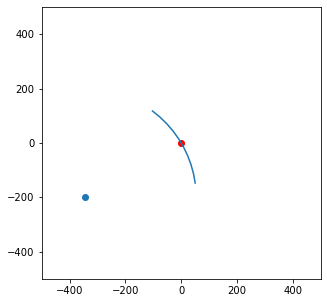

In [9]:
plt.figure(figsize=[5, 5])
plt.scatter(x0, y0)
plt.scatter(0, 0, c='red')
plt.plot(xs, ys)
plt.xlim([-500, 500])
plt.ylim([-500, 500])
plt.savefig('{}/{}/arc_{}'.format(os.environ['DROPBOX_ROOT'],run_name,run_name))

In [10]:
for i in range(nframes):
    fprops.append({
      "xyz": [xs[i], ys[i], 0.0],
      "angles": [angs[i], 0.0, 0.0]
    })

In [11]:
allprops = {"camera_props": cprops,"frame_props":fprops }

In [12]:
print(json.dumps(allprops,indent=2))

{
  "camera_props": {
    "projection": "stereographic",
    "step_size": 1,
    "max_dist": 3000.0,
    "fov": 45.0,
    "x_pix": 60,
    "y_pix": 40,
    "vmax": "auto",
    "clip_mode": "tanh",
    "fuzzy": true,
    "randomize_angles": true,
    "euler_convention": "szyz"
  },
  "frame_props": [
    {
      "xyz": [
        50.167783035748755,
        -147.78952311197943,
        0.0
      ],
      "angles": [
        -3.0106929596902186,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        44.108241334198,
        -113.42415442475912,
        0.0
      ],
      "angles": [
        -2.9234264970905026,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        35.07661878551545,
        -79.71768019829088,
        0.0
      ],
      "angles": [
        -2.836160034490786,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        23.14165149073932,
        -46.92662705396427,
        0.0
      ],
      "angles": [
        -2.7488935718910694,
   

In [13]:
with open('{}/{}/{}.json'.format(os.environ['DROPBOX_ROOT'],run_name,run_name), 'w') as outfile:
    json.dump(allprops, outfile,indent=2)

In [14]:
os.system("python3 project_frames.py {}/{}/{}.json {}/leike2020_bayestar19_splice.npy {}/{}/frames/{}_{{:05d}}.png"
          .format(os.environ['DROPBOX_ROOT'],run_name,run_name,os.environ['DROPBOX_ROOT'],os.environ['DROPBOX_ROOT'],run_name, run_name))
          

os.system("{}/ffmpeg -r 30 -start_number 0 -i {}/{}/frames/{}_%05d.png -c:v libx264 -s 600x400 -r 30 -pix_fmt yuv420p {}/{}/{}.mp4"
          .format(os.environ['FFMPEG_ROOT'],os.environ['DROPBOX_ROOT'],run_name,run_name,os.environ['DROPBOX_ROOT'],run_name, run_name))



0